# Locally weighted regression

In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

path = './data/'

import os
os.getcwd()

'/Users/calebskinner/Desktop/Rice/Second Year/CS 540 Statistical Machine Learning/Homework 1/lwr'

# Plotting code

In [23]:
def plot_data(x, y, title):
    plt.figure(figsize=(10,4))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x[:,1],y,'bo')
    plt.title(title);
    
def plot_predictions(x, y, ypred, title):
    plt.figure(figsize=(10,4))
    plt.plot(x[:,1],y,'bo',label='ground truth')
    plt.plot(x[:,1],ypred,'rx',label='prediction')
    plt.suptitle(title,fontsize=12)
    plt.legend(loc='upper left')

# Get train, validation and test data

In [22]:
# read an x,y csv file and add a column of ones to X.
def load_dataset(filename, add_intercept=True):
    data = np.loadtxt(path + filename, delimiter = ",", skiprows = 1)
    x,y = data[:,0], data[:,1]
    if add_intercept:
        x = np.stack((np.ones(x.shape[0],),x),axis=1)
    return x,y 


xtrain,ytrain = load_dataset("lwr_train.csv")
xvalid,yvalid = load_dataset("lwr_valid.csv")
xtest,ytest = load_dataset("lwr_test.csv")

# Plot  training data 

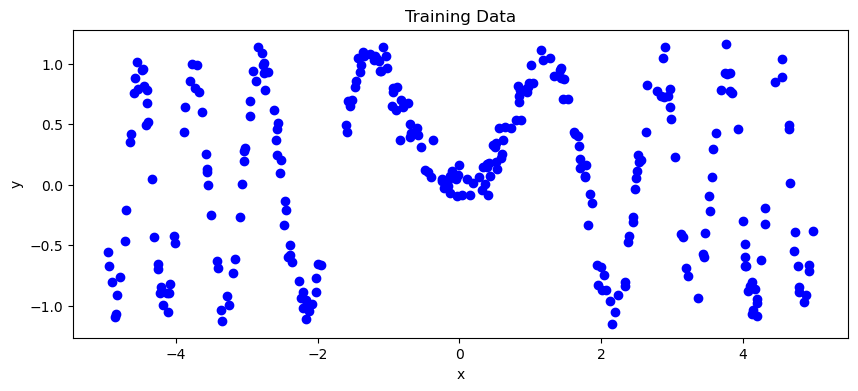

In [21]:
plot_data(xtrain,ytrain,'Training Data')

# Locally weighted regression

In [41]:
class LocallyWeightedLinearRegression():
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(xtrain, ytrain)
        > clf.predict(xvalid)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        :param x: Training example inputs. Shape (m, d).
        :param y: Training example labels. Shape (m,).
        """
        ###### START YOUR CODE HERE #########
        # 2 lines expected
        self.x = x
        self.y = y
        
        ###### END YOUR CODE HERE #########
        

    def predict(self, xq):
        """Make predictions given inputs xq.

        :param xq: Inputs of shape (n, d).
        :return ypred:  Outputs of shape (n,).
        """

        n,d = xq.shape
        
        ###### START YOUR CODE HERE #########
       
        # Compute pairwise squared distances between queries and training points (1 line in vectorized form)
        # Hint: use cdist
        dist = cdist(xq, self.x, 'sqeuclidean') # compute euclidean distances

        # Compute weights matrix W for all queries: shape (n,m) (1 line in vectorized form)
        W = np.exp(-dist / (2 * self.tau**2)) # compute vectorized weights
        
        # Initialize predictions in ypred to zeros (1 line in vectorized form)
        ypred = np.zeros(n)
       
        # While the code above is vectorized, we loop over query points 
        # computing the diagnoal Wi matrix for that point from W, and using the
        # weighted normal equation for solving for the theta vector.
        # Then predict on query with the dot product of that theta and the query vector
        # (can't fully avoid the loop due to per-query W) 
        # (about seven lines here)
        for i in range(n):
            Wi = np.diag(W[i])             # weight matrix
            
            xT_Wi = self.x.T @ Wi          # X^T W
            
            theta = np.linalg.inv(xT_Wi @ self.x) @ xT_Wi @ self.y # compute theta
            
            ypred[i] = xq[i] @ theta # predicted value             
        
        return ypred
    ###### END YOUR CODE HERE #########

# Test your LWR implementation
    - run this cell after you have completed the LWR class implementation above

Mean Squared Error =  0.0242
Overall, the local linear regression model is a pretty solid fit for the data. The model is able to identify the sharp fluctuations with X. However, the model does underfit the data in the local minima and maxima. The predictions tend to underestimate the ground truth at these peaks and valleys.


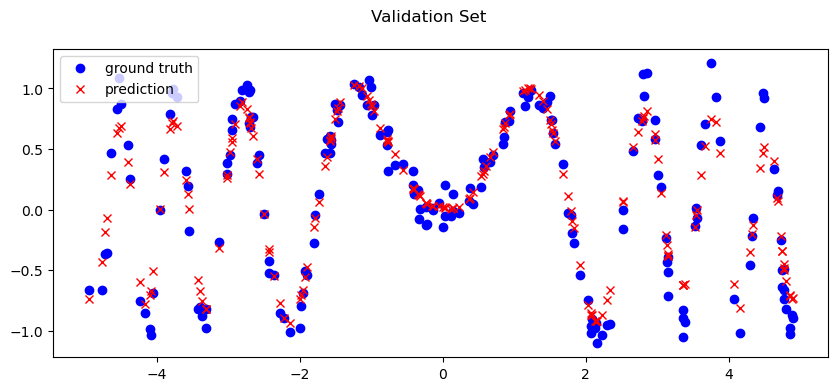

In [112]:
tau = 0.1

clf = LocallyWeightedLinearRegression(tau)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xvalid)
plot_predictions(xvalid, yvalid, ypred, 'Validation Set')
print('Mean Squared Error = ', round(np.mean((ypred - yvalid)**2), 4))
print('Overall, the local linear regression model is a pretty solid fit for the data. \
The model is able to identify the sharp fluctuations with X. \
However, the model does underfit the data in the local minima and maxima. \
The predictions tend to underestimate the ground truth at these peaks and valleys.')

# Select best tau using validation set
 - loop over the given set of taus, training the model on (xtrain,ytrain), and measuring mean squared error on (xvalid,yvalid). 
 - select the tau with the lowest validation set error, call it best_tau. The lowest error is lowest_mse

In [115]:
taus = [3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
d = len(taus) # cardinality of set of taus

###### START YOUR CODE HERE #########
# 8-10 lines expected
mse = np.zeros(d) # initialize mse vector

for j in range(d):
    clf = LocallyWeightedLinearRegression(taus[j]) # run local regression model
    clf.fit(xtrain, ytrain) # fit model
    ypred = clf.predict(xvalid) # compute prediction on xvalid
    mse[j] = np.mean((ypred - yvalid)**2) # measure mse on yvalid

lowest_mse = min(mse)
best_tau = taus[np.argmin(mse)]

print("The best tau is", best_tau, "with a CV mse of", round(lowest_mse, 4))

clf = LocallyWeightedLinearRegression(best_tau) # run best model
###### END YOUR CODE HERE #########

The best tau is 0.05 with a CV mse of 0.0124


# Build the best LWR model and evaluate on (xtest,ytest)
- run this cell after you complete the previous one

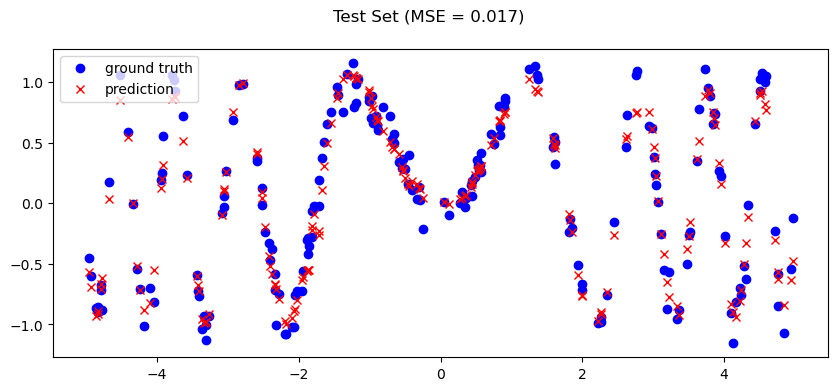

In [114]:
clf.fit(xtrain,ytrain)
ytest_pred = clf.predict(xtest)

plot_predictions(xtest, ytest, ytest_pred,f'Test Set (MSE = {round(np.mean((ytest_pred - ytest)**2), 4)})')